In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, confusion_matrix, precision_score,
    recall_score, f1_score, roc_auc_score, roc_curve
)

In [56]:
data = pd.read_csv('Breast Cancer Wisconsin Dataset.csv')
df = pd.DataFrame(data)

In [57]:
print(df.head(20))

          id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0     842302         M        17.99         10.38          122.80     1001.0   
1     842517         M        20.57         17.77          132.90     1326.0   
2   84300903         M        19.69         21.25          130.00     1203.0   
3   84348301         M        11.42         20.38           77.58      386.1   
4   84358402         M        20.29         14.34          135.10     1297.0   
5     843786         M        12.45         15.70           82.57      477.1   
6     844359         M        18.25         19.98          119.60     1040.0   
7   84458202         M        13.71         20.83           90.20      577.9   
8     844981         M        13.00         21.82           87.50      519.8   
9   84501001         M        12.46         24.04           83.97      475.9   
10    845636         M        16.02         23.24          102.70      797.8   
11  84610002         M        15.78     

In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [59]:
print(df['diagnosis'].value_counts())

diagnosis
B    357
M    212
Name: count, dtype: int64


# Check for NULL values

In [70]:
df.isnull().sum()

id                           0
diagnosis                    0
radius_mean                  0
texture_mean                 0
perimeter_mean               0
area_mean                    0
smoothness_mean              0
compactness_mean             0
concavity_mean               0
concave points_mean          0
symmetry_mean                0
fractal_dimension_mean       0
radius_se                    0
texture_se                   0
perimeter_se                 0
area_se                      0
smoothness_se                0
compactness_se               0
concavity_se                 0
concave points_se            0
symmetry_se                  0
fractal_dimension_se         0
radius_worst                 0
texture_worst                0
perimeter_worst              0
area_worst                   0
smoothness_worst             0
compactness_worst            0
concavity_worst              0
concave points_worst         0
symmetry_worst               0
fractal_dimension_worst      0
Unnamed:

Label encoding

In [60]:
# Convert diagnosis to binary
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

# Separate features and target
X = df.drop(['diagnosis', 'id', 'Unnamed: 32'], axis=1, errors='ignore')
y = df['diagnosis']


# Train-test split (80% train, 20% test)

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features

In [62]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train Logistic Regression model

In [63]:
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

# Predict on test data

In [64]:
y_pred = model.predict(X_test_scaled)
y_proba = model.predict_proba(X_test_scaled)[:, 1]

# Evaluate the model

In [65]:
acc = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

In [66]:
print("Accuracy:", round(acc, 4))
print("Confusion Matrix:\n", conf_matrix)
print("Precision:", round(precision, 4))
print("Recall:", round(recall, 4))
print("F1 Score:", round(f1, 4))
print("ROC-AUC Score:", round(roc_auc, 4))

Accuracy: 0.9737
Confusion Matrix:
 [[70  1]
 [ 2 41]]
Precision: 0.9762
Recall: 0.9535
F1 Score: 0.9647
ROC-AUC Score: 0.9974


# ROC Curve

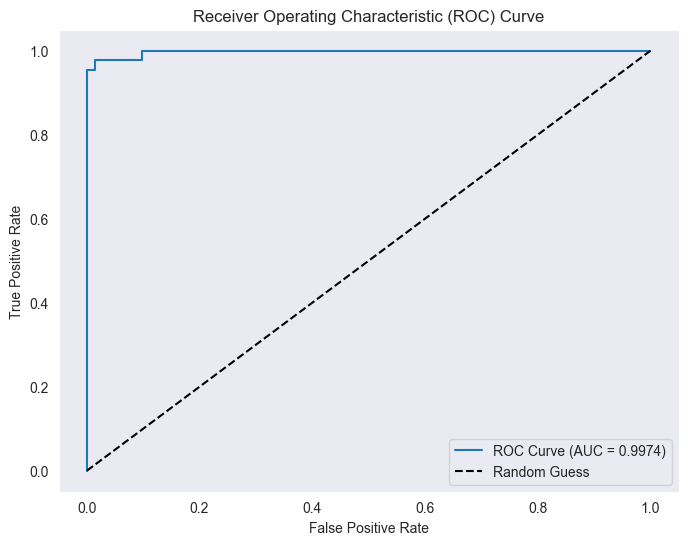

In [67]:
fpr, tpr, thresholds = roc_curve(y_test, y_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.grid()
plt.show()

# Threshold tuning

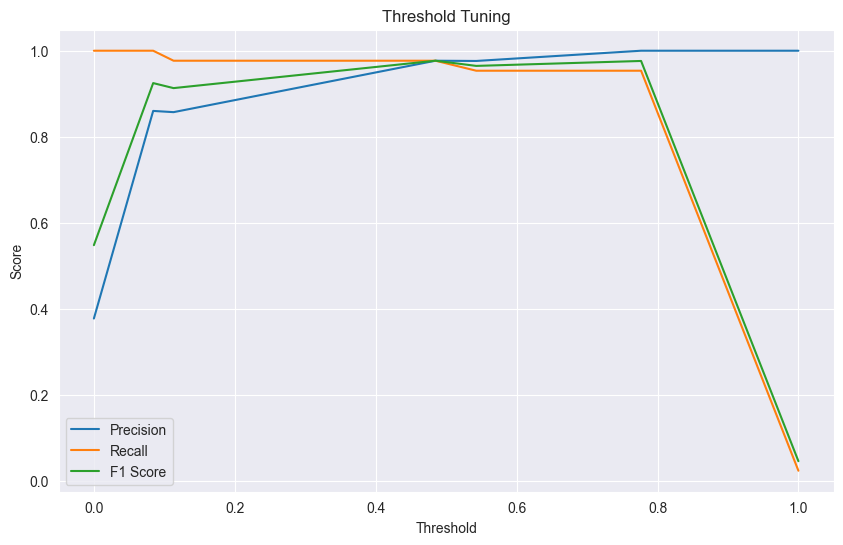

In [68]:
precision_scores = []
recall_scores = []
f1_scores = []

for t in thresholds:
    y_pred_thresh = (y_proba >= t).astype(int)
    precision_scores.append(precision_score(y_test, y_pred_thresh, zero_division=0))
    recall_scores.append(recall_score(y_test, y_pred_thresh, zero_division=0))
    f1_scores.append(f1_score(y_test, y_pred_thresh, zero_division=0))

# Plot Precision-Recall-F1 vs Threshold
plt.figure(figsize=(10, 6))
plt.plot(thresholds, precision_scores, label='Precision')
plt.plot(thresholds, recall_scores, label='Recall')
plt.plot(thresholds, f1_scores, label='F1 Score')
plt.xlabel('Threshold')
plt.ylabel('Score')
plt.title('Threshold Tuning')
plt.legend()
plt.grid(True)
plt.show()

In [69]:
best_index = np.argmax(f1_scores)
best_threshold = thresholds[best_index]
best_f1 = f1_scores[best_index]

print(f"Best Threshold = {best_threshold:.2f}")
print(f"F1 Score at Best Threshold = {best_f1:.4f}")


Best Threshold = 0.48
F1 Score at Best Threshold = 0.9767
